In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os

# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
def read_merged(weather, year):
    return pd.read_csv('../../merged/merged_{}_{}.csv.gz'.format(weather, year)).drop(columns=['Unnamed: 0'])

In [3]:
meso = read_merged('meso', 2020)

In [4]:
meso.head()

DATE  MONTH       LAT        LON STR_RANK  LL_ROT_VEL  LL_DV  \
0  2020-01-01      1  48.29600 -121.35878       5L          37     52   
1  2020-01-01      1  48.21823 -122.27442       6L          23     22   
2  2020-01-01      1  48.23901 -122.22985       5L          24     37   
3  2020-01-01      1  48.21567 -122.29905       5L          20     33   
4  2020-01-01      1  48.26300 -122.77732       5L          35     35   

   LL_BASE  DEPTH_KFT  DPTH_STMRL  MAX_RV_KFT  MAX_RV_KTS TVS   MSI  \
0        4          8         100           6          40   N  3119   
1        7          3          68          10          52   N  4380   
2        8         10         100           9          51   N  3465   
3        5          6          57          11          34   N  2870   
4        7          8         100           9          49   N  4012   

             COUNTY       STATE  POWER_OUTAGE  
0  Snohomish County  Washington         False  
1  Snohomish County  Washington         False  
2  Snohomish County  Washington         False  
3  Snohomish County  Washington         False  
4     Island County  Washington         False

In [5]:
meso['POWER_OUTAGE'].value_counts(normalize=True)

POWER_OUTAGE
False    0.934368
True     0.065632
Name: proportion, dtype: float64

In [6]:
meso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082446 entries, 0 to 1082445
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DATE          1082446 non-null  object 
 1   MONTH         1082446 non-null  int64  
 2   LAT           1082446 non-null  float64
 3   LON           1082446 non-null  float64
 4   STR_RANK      1082446 non-null  object 
 5   LL_ROT_VEL    1082446 non-null  int64  
 6   LL_DV         1082446 non-null  int64  
 7   LL_BASE       1082446 non-null  int64  
 8   DEPTH_KFT     1082446 non-null  int64  
 9   DPTH_STMRL    1082446 non-null  int64  
 10  MAX_RV_KFT    1082446 non-null  int64  
 11  MAX_RV_KTS    1082446 non-null  int64  
 12  TVS           1082446 non-null  object 
 13  MSI           1082446 non-null  int64  
 14  COUNTY        1082446 non-null  object 
 15  STATE         1082446 non-null  object 
 16  POWER_OUTAGE  1082446 non-null  bool   
dtypes: bool(1), float64(2), int

In [16]:
attributes = ['LL_ROT_VEL', 'LL_DV', 'LL_BASE', 'DEPTH_KFT', 'DPTH_STMRL', 'MAX_RV_KFT', 'MAX_RV_KTS', 'MSI']

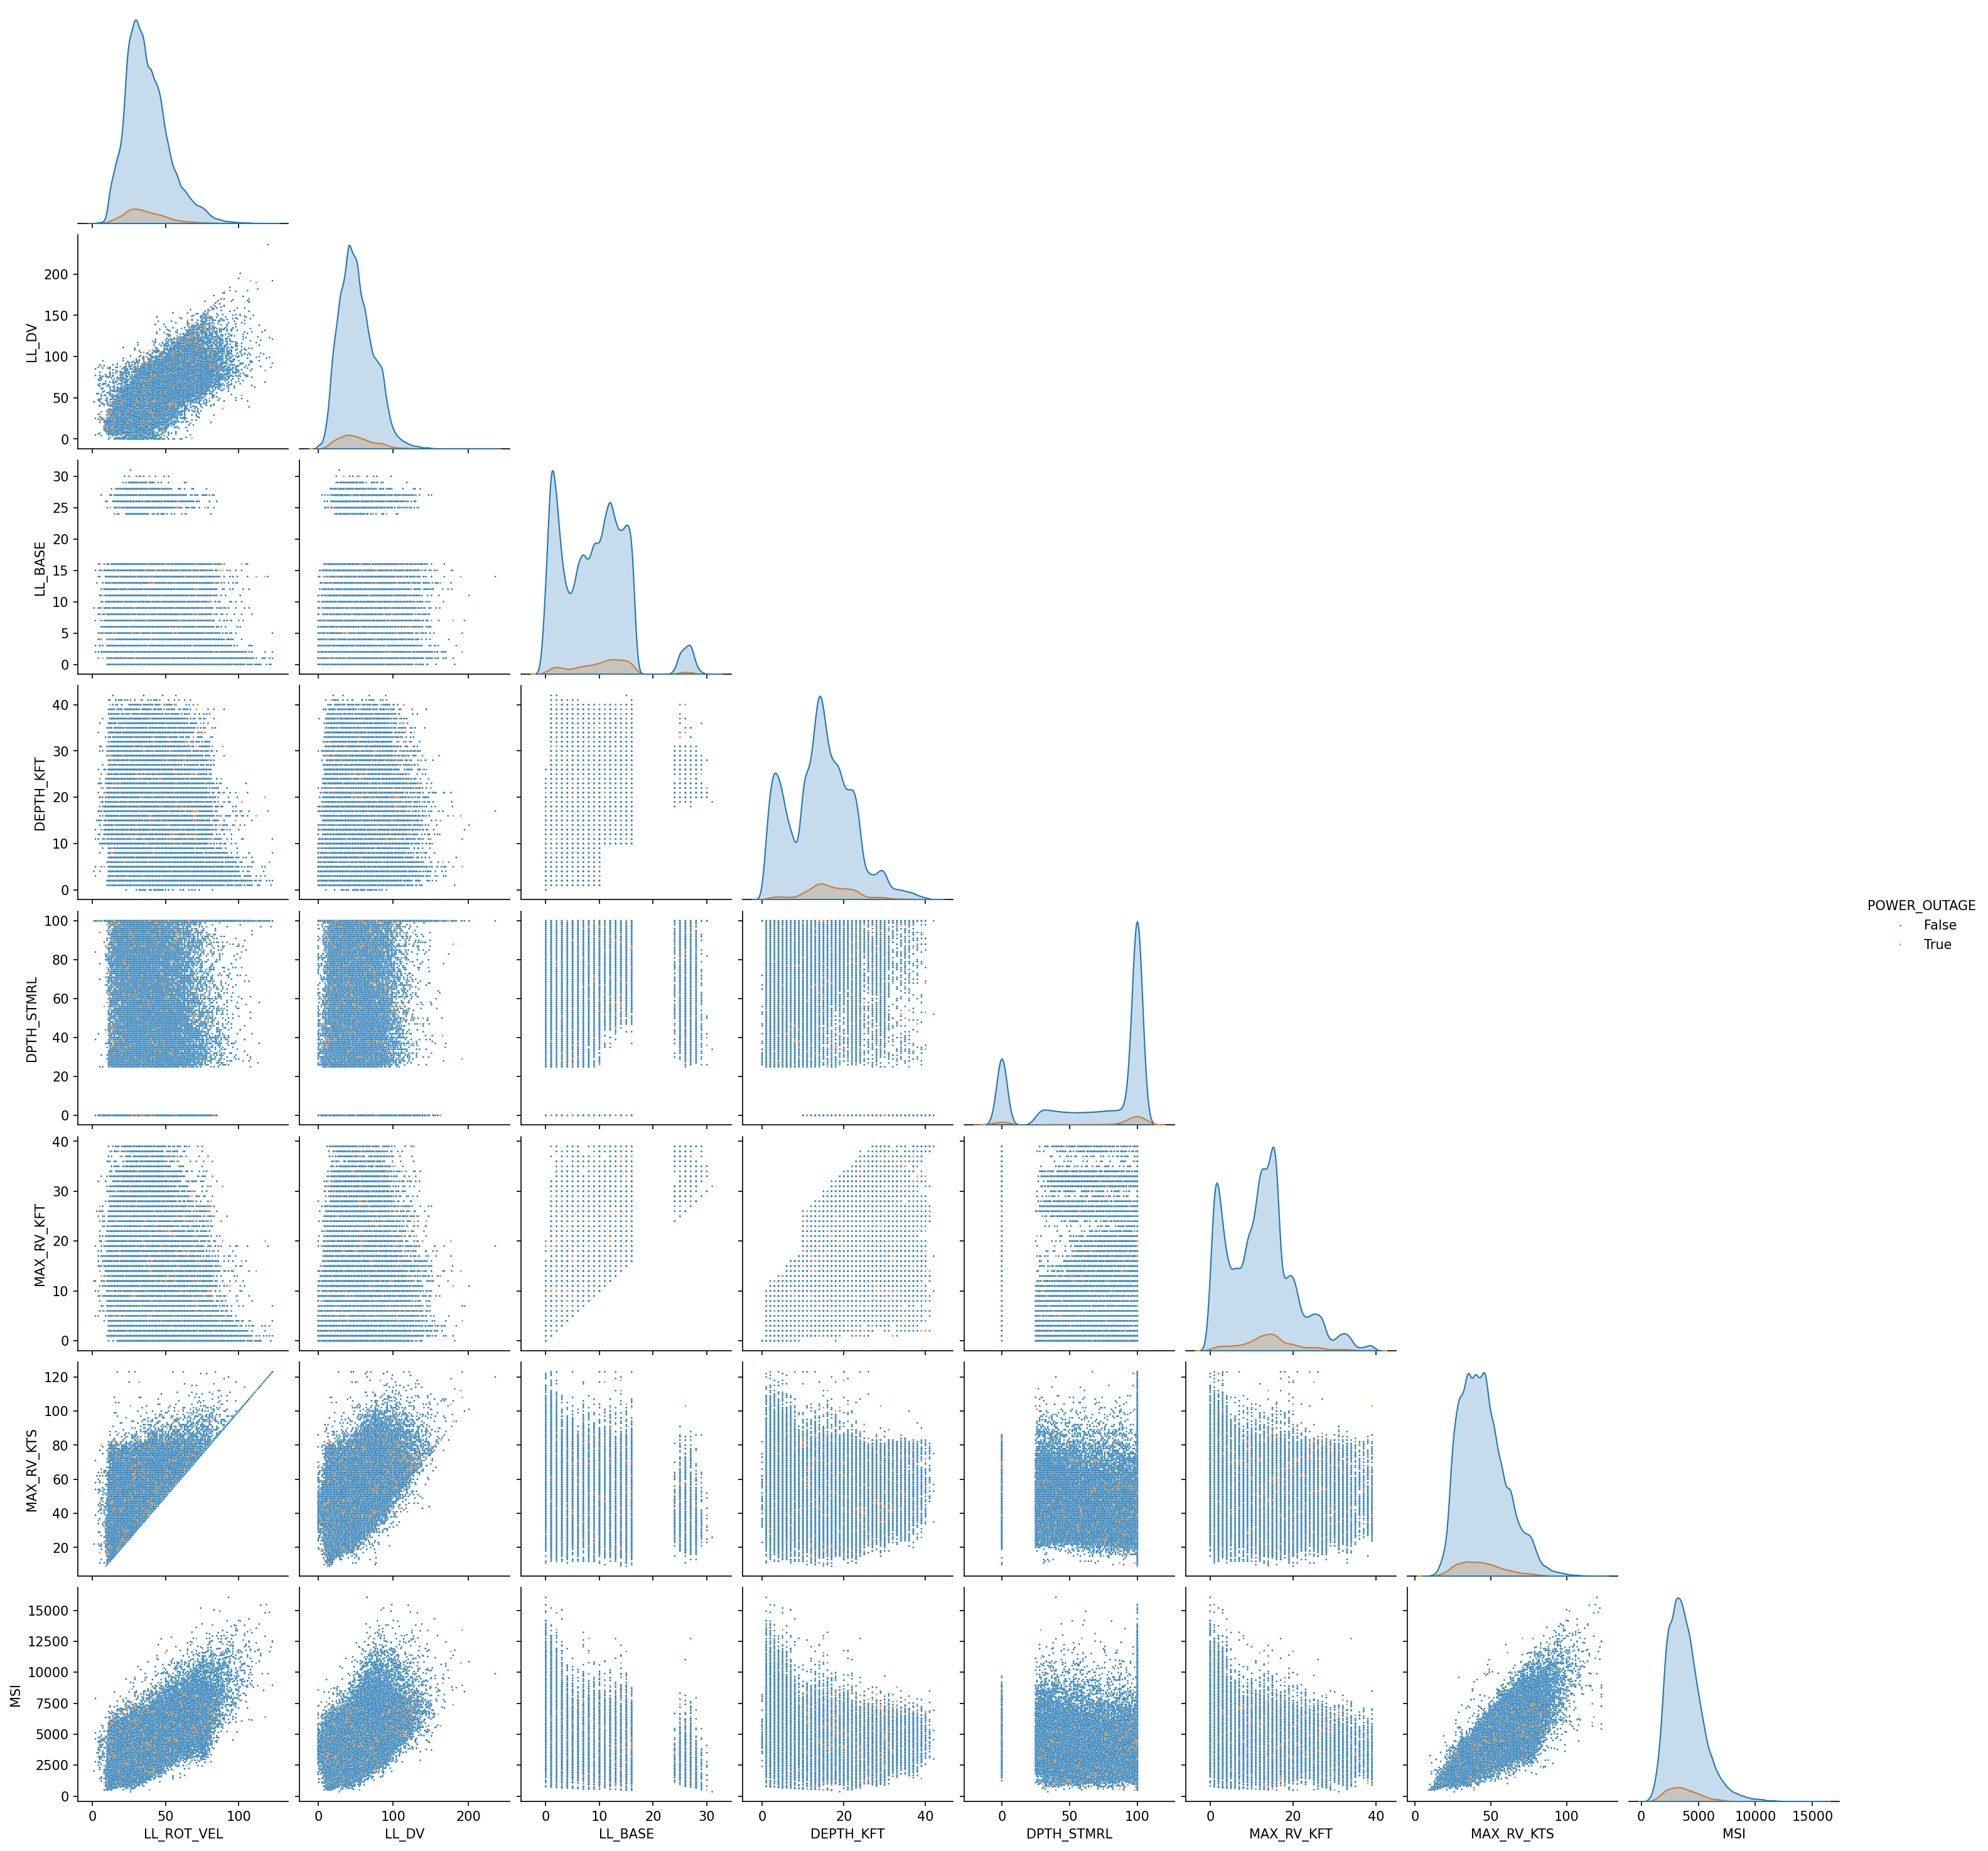

In [17]:
meso_sample = meso.sample(frac=0.1)
sns.pairplot(meso_sample, x_vars=attributes,
                          y_vars=attributes,
                          hue='POWER_OUTAGE',  plot_kws={'s': 2}, corner=True)

In [18]:
outage = meso[meso['POWER_OUTAGE']==True]
no_outage = meso[meso['POWER_OUTAGE']==False]
no_outage = no_outage.sample(n=len(outage))
meso_balanced = pd.concat([outage, no_outage],axis=0)

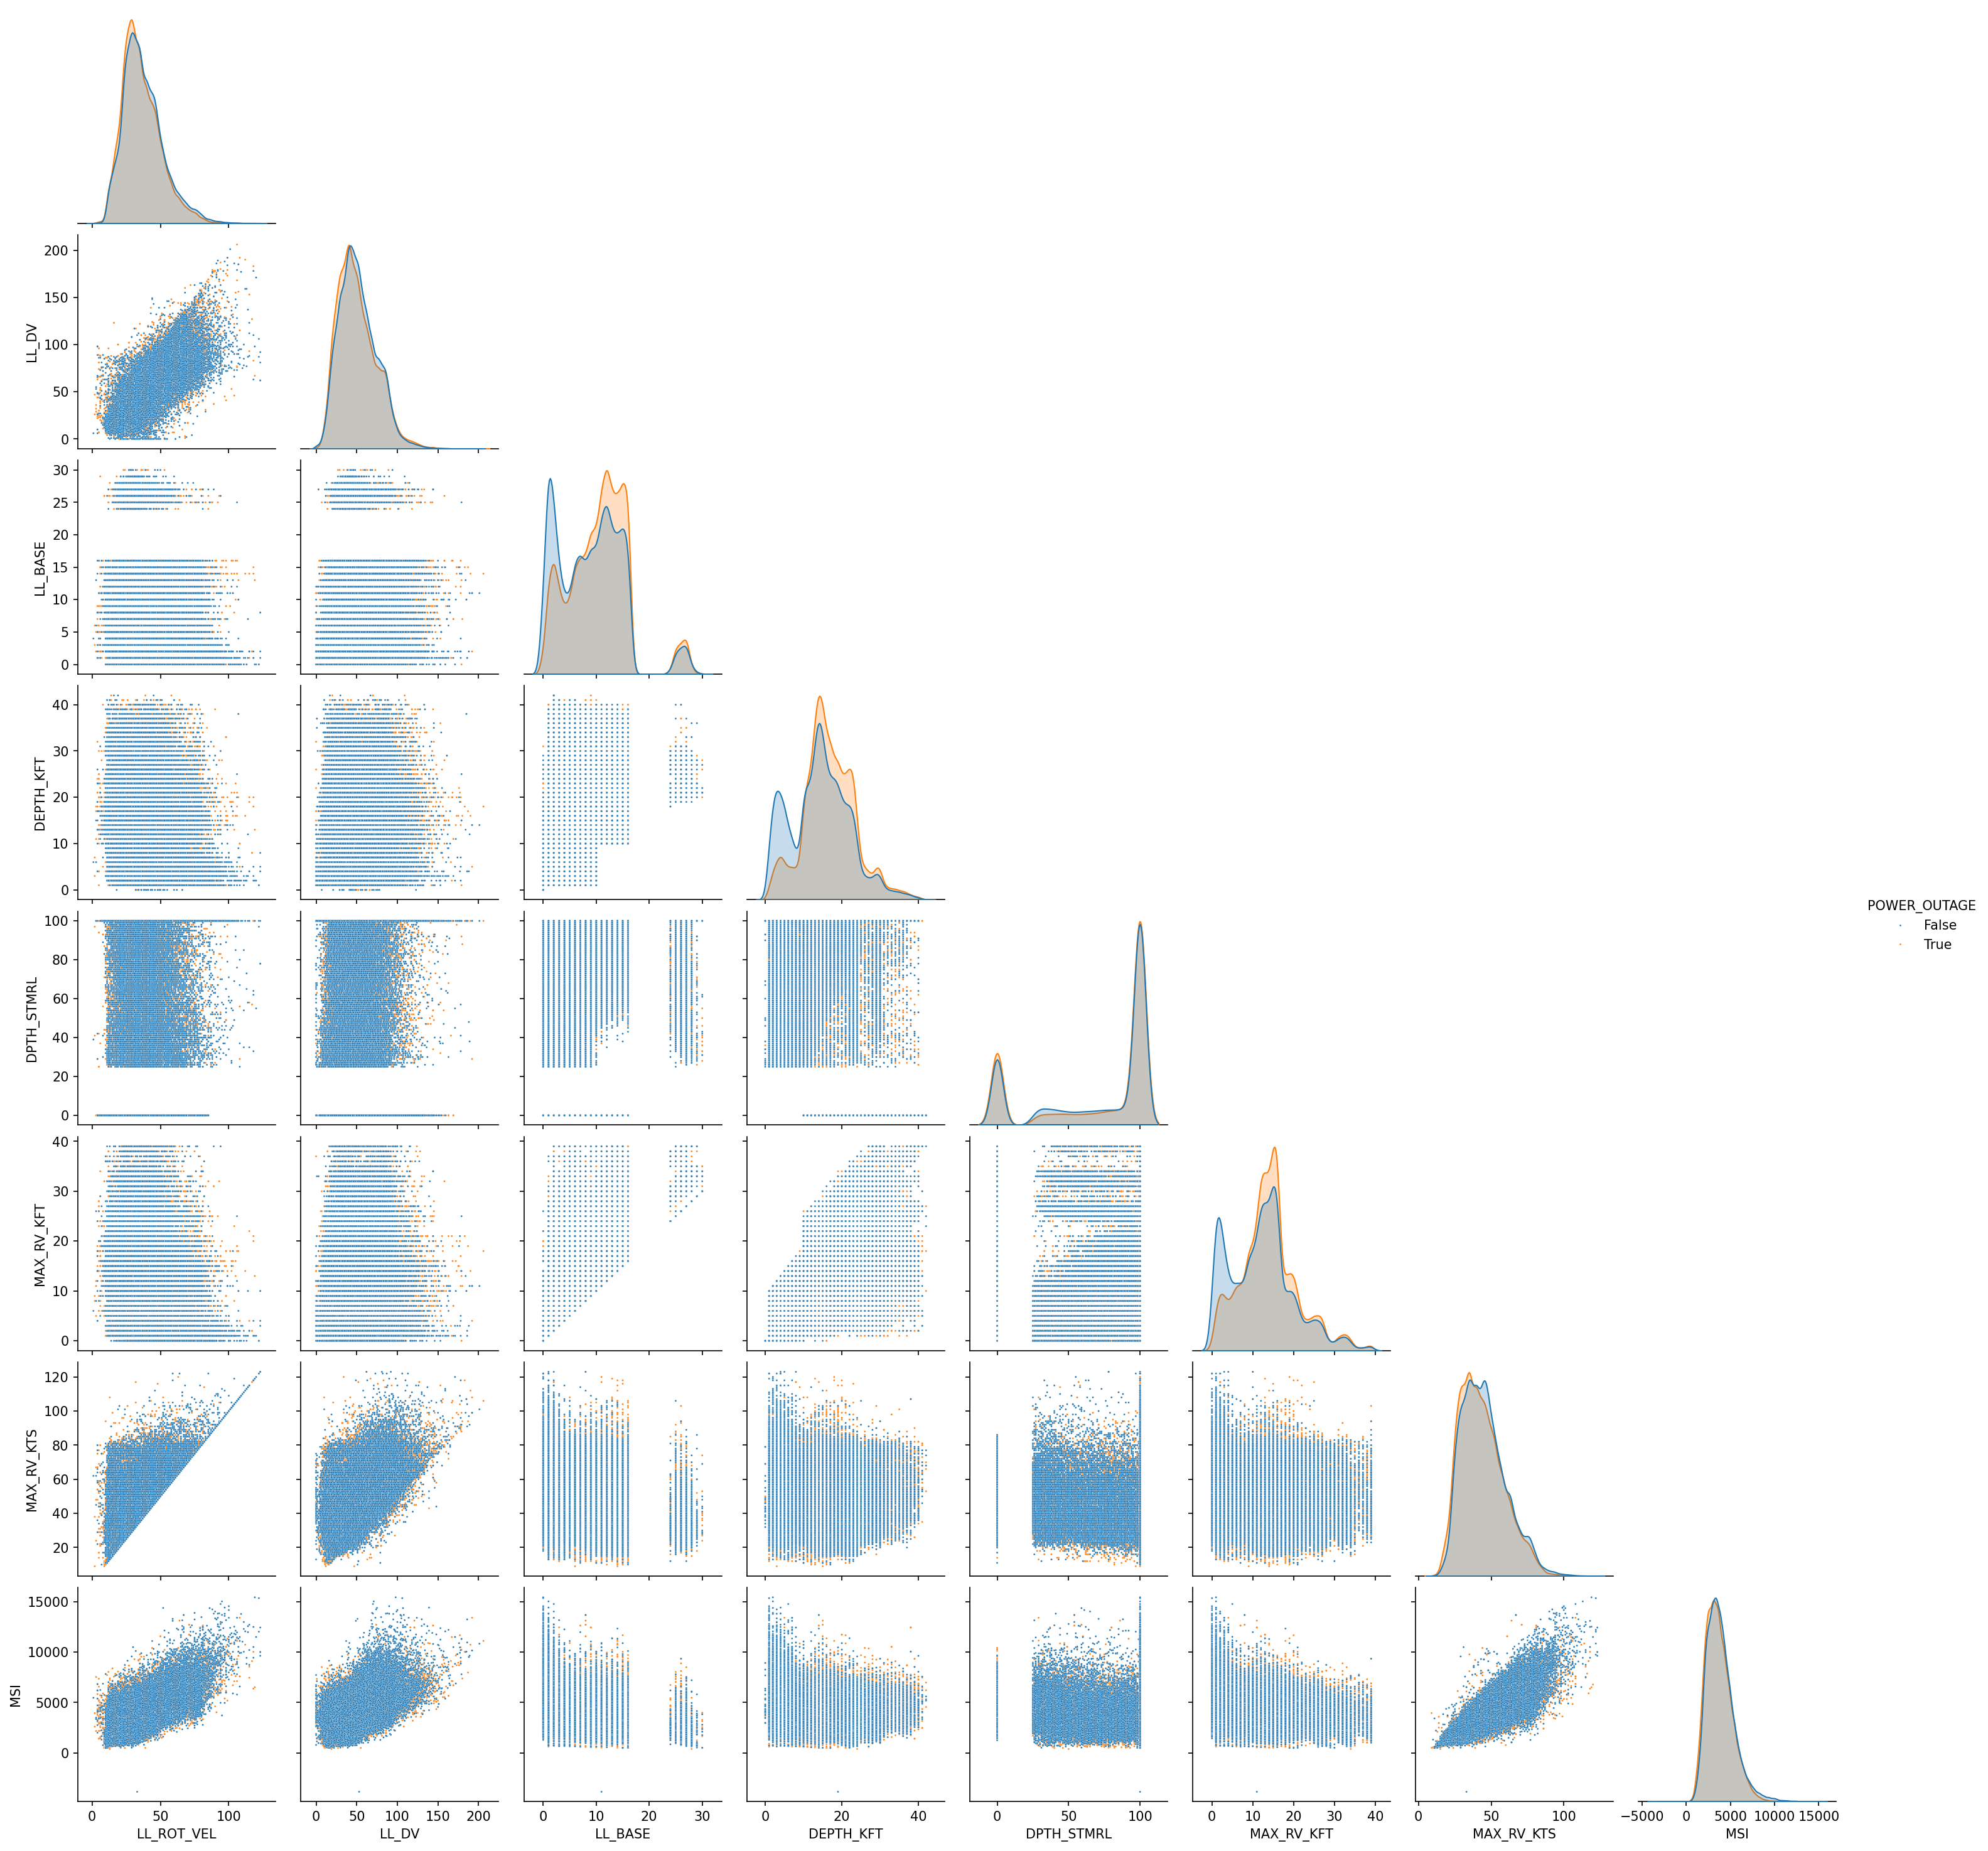

In [19]:
sns.pairplot(meso_balanced, x_vars=attributes,
                            y_vars=attributes,
                            hue='POWER_OUTAGE',  plot_kws={'s': 2}, corner=True)